In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Change the import statement
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
df = pd.read_csv(r"C:\Users\SAJAN\Downloads\oakland 2012.csv")


In [3]:
df["DATE"][0]


'2012-01-01'

In [4]:
df['DATE']=pd.to_datetime(df['DATE'])

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  4016 non-null   object        
 1   NAME     4016 non-null   object        
 2   DATE     4016 non-null   datetime64[ns]
 3   AWND     4014 non-null   float64       
 4   PGTM     4016 non-null   int64         
 5   PRCP     4003 non-null   float64       
 6   TAVG     0 non-null      float64       
 7   TMAX     4009 non-null   float64       
 8   TMIN     4009 non-null   float64       
 9   WDF2     4016 non-null   int64         
 10  WDF5     4016 non-null   int64         
 11  WSF2     4016 non-null   float64       
 12  WSF5     4016 non-null   float64       
 13  WT01     647 non-null    float64       
 14  WT02     80 non-null     float64       
 15  WT03     97 non-null     float64       
 16  WT04     2 non-null      float64       
 17  WT05     7 non-null      float64 

In [6]:
w= df[["DATE","PRCP","TMAX","TMIN"]].copy()
w.columns = ["DATE","Precipitation","Temp_Max","Temp_Min"]
w["DATE"][0]
w['DATE'] = pd.to_datetime(w['DATE'])
weather_new = w.set_index("DATE")
weather_new


,Precipitation,Temp_Max,Temp_Min
DATE,,,
2012-01-01,0.01,45.0,30.0
2012-01-02,0.00,30.0,19.0
2012-01-03,0.00,21.0,16.0
2012-01-04,0.00,35.0,19.0
2012-01-05,0.00,40.0,25.0
...,...,...,...
2022-12-27,0.00,26.0,15.0
2022-12-28,0.00,41.0,26.0
2022-12-29,0.00,53.0,37.0


In [7]:
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2012-01-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  4003 non-null   float64
 1   Temp_Max       4009 non-null   float64
 2   Temp_Min       4009 non-null   float64
dtypes: float64(3)
memory usage: 125.5 KB


In [8]:
weather_new[pd.isnull(weather_new["Precipitation"])]

,Precipitation,Temp_Max,Temp_Min
DATE,,,
2015-05-06,NaN,73.0,50.0
2015-05-09,NaN,78.0,58.0
2015-05-28,NaN,79.0,54.0
2015-06-01,NaN,63.0,43.0
2015-06-02,NaN,71.0,42.0
2015-06-03,NaN,74.0,47.0
2016-03-29,NaN,51.0,30.0
2017-06-16,NaN,84.0,63.0
2017-06-27,NaN,73.0,50.0


In [9]:
weather_new["Precipitation"]=weather_new["Precipitation"].fillna(0)

In [10]:
weather_new = weather_new.fillna(method = "ffill")

In [11]:
weather_new.index = pd.to_datetime(weather_new.index)


In [12]:
weather_new

,Precipitation,Temp_Max,Temp_Min
DATE,,,
2012-01-01,0.01,45.0,30.0
2012-01-02,0.00,30.0,19.0
2012-01-03,0.00,21.0,16.0
2012-01-04,0.00,35.0,19.0
2012-01-05,0.00,40.0,25.0
...,...,...,...
2022-12-27,0.00,26.0,15.0
2022-12-28,0.00,41.0,26.0
2022-12-29,0.00,53.0,37.0


In [13]:
weather_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2012-01-01 to 2022-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Precipitation  4016 non-null   float64
 1   Temp_Max       4016 non-null   float64
 2   Temp_Min       4016 non-null   float64
dtypes: float64(3)
memory usage: 125.5 KB


In [14]:
#start_date = 1986-O3-O1
#end_date = 2001-O3-O1

# Use .loc to drop rows based on DateTime conditions
#weather_new = weather_new.loc[~((weather_new['DATE'] >= start_date) & (weather_new['DATE'] <= end_date))]

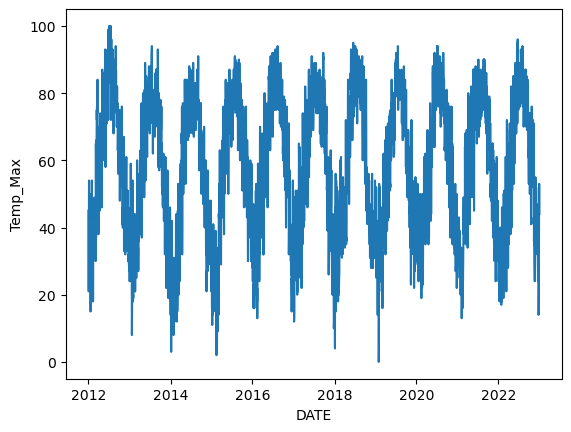

In [15]:
plt.xlabel('DATE')
plt.ylabel('Temp_Max')
plt.plot(weather_new["Temp_Max"])

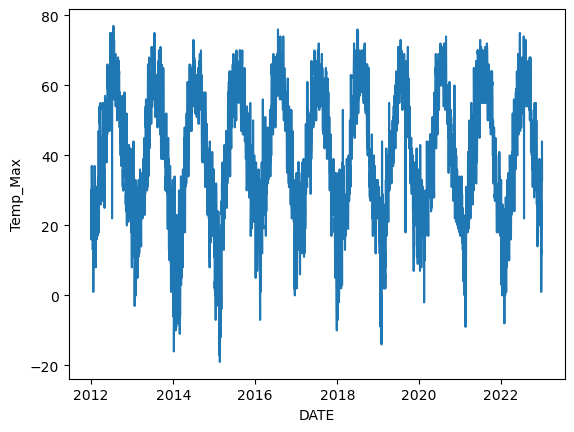

In [16]:
plt.xlabel('DATE')
plt.ylabel('Temp_Max')
plt.plot(weather_new["Temp_Min"])

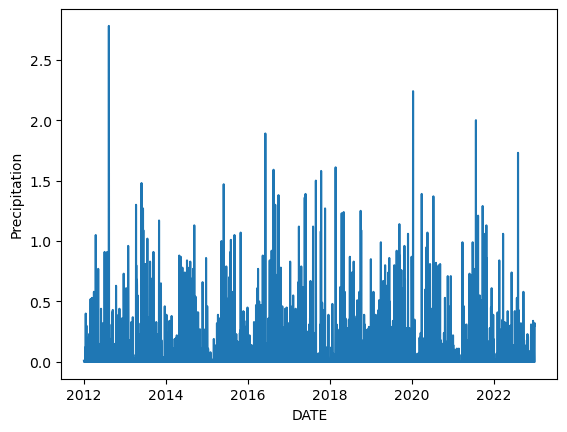

In [17]:

plt.xlabel('DATE')
plt.ylabel('Precipitation')
plt.plot(weather_new["Precipitation"])

In [18]:
weather_max = pd.DataFrame(weather_new["Temp_Max"])

In [19]:
weather_max

,Temp_Max
DATE,
2012-01-01,45.0
2012-01-02,30.0
2012-01-03,21.0
2012-01-04,35.0
2012-01-05,40.0
...,...
2022-12-27,26.0
2022-12-28,41.0
2022-12-29,53.0


In [20]:
weather_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2012-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp_Max  4016 non-null   float64
dtypes: float64(1)
memory usage: 62.8 KB


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
weather_max.isnull().sum()

Temp_Max    0
dtype: int64

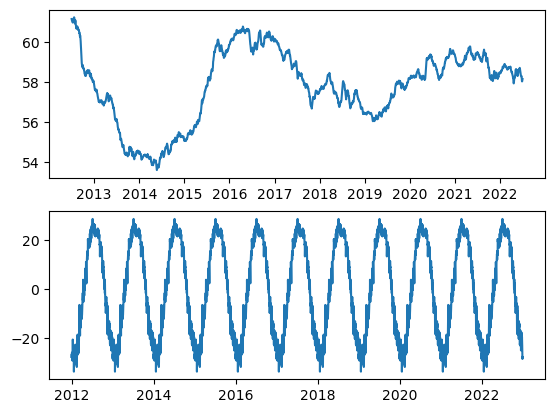

In [23]:

decompose = seasonal_decompose(weather_max,period=365)
trend = decompose.trend
seasonal=decompose.seasonal
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(seasonal)

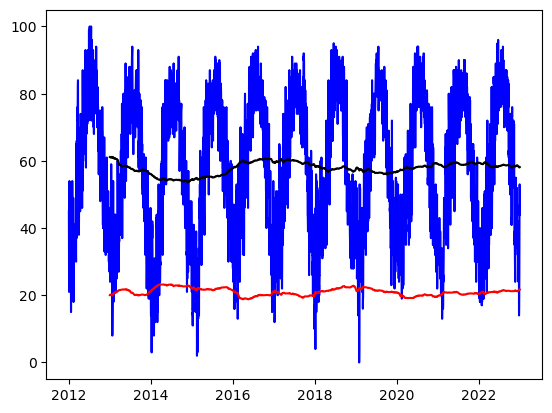

In [24]:
rol_mean = weather_new["Temp_Max"].rolling(window = 365).mean()
rol_std = weather_new["Temp_Max"].rolling(window = 365).std()
plt.plot(weather_new["Temp_Max"], c="blue")
plt.plot(rol_mean, c="black")
plt.plot(rol_std, c="red")

In [25]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(weather_max["Temp_Max"])
print(dftest)

(-3.540913922339994, 0.0069964483233087935, 18, 3997, {'1%': -3.431987103983426, '5%': -2.862263382987423, '10%': -2.56715506449264}, 27258.574380140013)


In [26]:
weather_max_new = weather_max['Temp_Max']-weather_max['Temp_Max'].shift(1)

In [27]:
weather_max_new

DATE
2012-01-01     NaN
2012-01-02   -15.0
2012-01-03    -9.0
2012-01-04    14.0
2012-01-05     5.0
              ... 
2022-12-27     5.0
2022-12-28    15.0
2022-12-29    12.0
2022-12-30     0.0
2022-12-31    -9.0
Name: Temp_Max, Length: 4016, dtype: float64

In [28]:
adfuller(weather_max_new.dropna())

(-20.32895875074306,
 0.0,
 18,
 3996,
 {'1%': -3.4319875139327345,
  '5%': -2.862263564080849,
  '10%': -2.567155160899137},
 27261.937785289705)

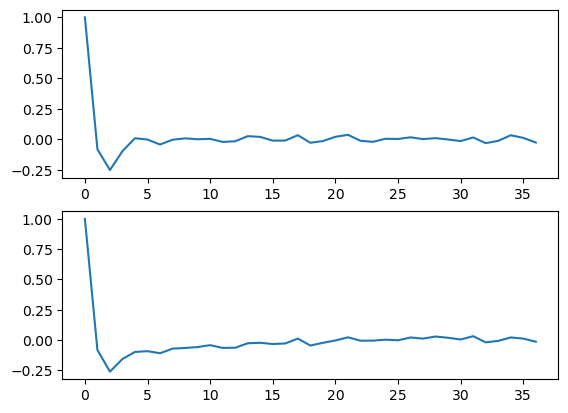

In [29]:
from statsmodels.tsa.stattools import acf, pacf
acf_plot = acf(weather_max_new.dropna())
pacf_plot = pacf(weather_max_new.dropna())
plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [30]:
weather_max.index = pd.DatetimeIndex(weather_max.index, freq=weather_max.index.inferred_freq).to_period('D')

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(weather_max, seasonal_order=(2,1,2,50))
model_fit = model.fit()

In [32]:

res =  model_fit.forecast(365*1)
res= pd.DataFrame(res)
res.columns=['Temp_Max']

In [33]:
res

,Temp_Max
2022-12-30,27.244962
2022-12-31,29.948733
2023-01-01,35.533960
2023-01-02,36.829292
2023-01-03,32.630059
...,...
2023-12-25,50.599146
2023-12-26,50.969675
2023-12-27,50.077574
2023-12-28,50.567049


In [34]:
weather_max.index= weather_max.index.to_timestamp()

In [35]:
weather_max.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4016 entries, 2012-01-01 to 2022-12-31
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp_Max  4016 non-null   float64
dtypes: float64(1)
memory usage: 62.8 KB


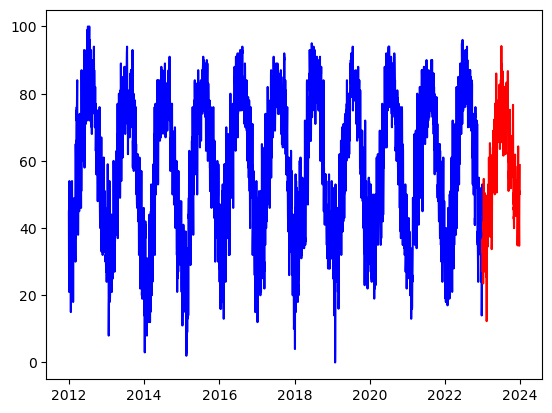

In [36]:

plt.plot(weather_max['Temp_Max'], c='blue')
plt.plot(res, c="red")
plt.show()


In [37]:
!pip install gradio

In [38]:
'''from datetime import datetime

now = test

year = now.strftime("%Y")
print("year:", year)

month = now.strftime("%m")
print("month:", month)

day = now.strftime("%d")
print("day:", day)

time = now.strftime("%H:%M:%S")
print("time:", time)

date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)	'''

'from datetime import datetime\n\nnow = test\n\nyear = now.strftime("%Y")\nprint("year:", year)\n\nmonth = now.strftime("%m")\nprint("month:", month)\n\nday = now.strftime("%d")\nprint("day:", day)\n\ntime = now.strftime("%H:%M:%S")\nprint("time:", time)\n\ndate_time = now.strftime("%m/%d/%Y, %H:%M:%S")\nprint("date and time:",date_time)\t'

In [41]:
import gradio as gr
n=int(input("enter the number of days you want to predict max temperature for :"))
test =  model_fit.forecast(n)
test= pd.DataFrame(test)
test.columns=['Temp_Max']
input_text =  model_fit.forecast(n)
print("Note: the value given for input should be same in both the cases")
# Define a function that takes user input and returns a date string.
def get_date(input_text):
    # Replace this with your actual date generation logic
    date_string = test
    return date_string

iface = gr.Interface(fn=get_date, inputs="text" ,outputs="text", live=True)

if __name__ == "__main__":
    iface.launch()


enter the number of days you want to predict max temperature for :8
Note: the value given for input should be same in both the cases
Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [43]:
model_fit.save("MINIPROJECTWEATHERFORECASTING")